# Alexine Studios

Tools:

* Matplotlib: a comprehensive library for creating visualizations in Python
* numpy: basic array manipulation
* scipy: scipy.ndimage submodule that handles image processing 

**Import Tools**

In [4]:
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [5]:
!wget -O image.jpg -qq https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Asiatic_Lion_Cub.jpg/200px-Asiatic_Lion_Cub.jpg

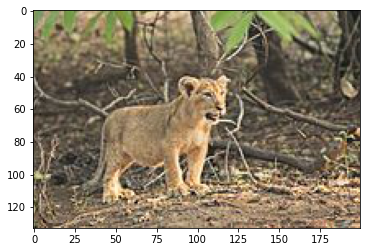

In [6]:
cub_image = imageio.imread('/content/image.jpg')

# display the array of pixels as an image
plt.imshow(cub_image)
plt.show()

In [7]:
# imageio actually makes use of a subclass of np.ndarray. If needed, the image can be converted to a plain numpy array using np.asarray(im).
# Convert the image to a numpy array and print the data type, size, and shape of the image 
data = np.asarray(cub_image)
type(data), data.size, data.shape

(numpy.ndarray, 79800, (133, 200, 3))

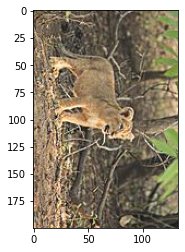

In [8]:
# Rotate the image by 90 degrees clockwise
# Or rotate by 90+180 degrees
from scipy import ndimage
plt.imshow(ndimage.rotate(cub_image, -90));

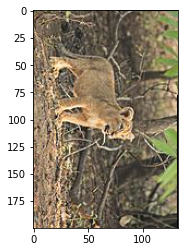

In [9]:
plt.imshow(ndimage.rotate(cub_image, 270));

In [10]:
# Obtain the min, max, and mean of the image
np.min(data), np.max(data), np.mean(data)

(0, 255, 110.16462406015037)

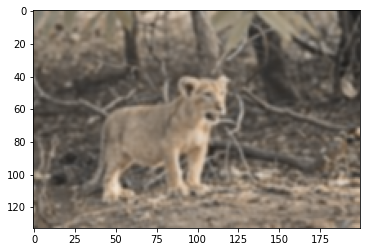

In [11]:
# Blur the image
# A Gaussian filter is a linear filter. It's usually used to blur the image or to reduce noise
# There are others like, Mean Filter, Median Filter, Canny Filter, etc..
blurImg = gaussian_filter(data, sigma=1)
plt.imshow(blurImg);

In [12]:
data.shape, np.mean(data), np.mean(data, axis=0).shape, np.mean(data, axis=1).shape,  np.mean(data, axis=2).shape

((133, 200, 3), 110.16462406015037, (200, 3), (133, 3), (133, 200))

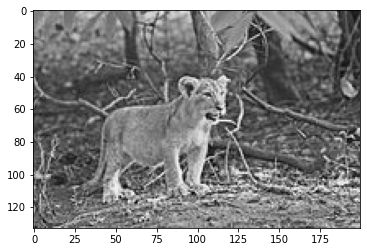

In [13]:
# Convert the image to grayscale 
grayScaleImg = np.mean(data, axis=2)

# The colormap is a dictionary which maps numbers to colors
# The gray colormap maps 0 to black and 1 to white
plt.imshow(grayScaleImg, cmap=plt.get_cmap("gray"));

After trimming: (66, 200, 3)


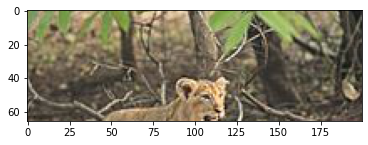

In [14]:
# Trim the Image to Half the original size
im_trim = data[0:data.shape[0] // 2]
print("After trimming:",im_trim.shape)
plt.imshow(im_trim);

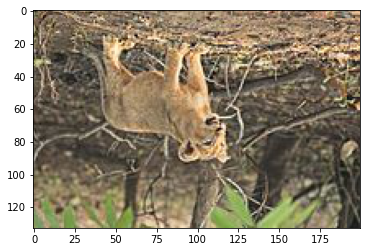

In [15]:
# Flip the image
plt.imshow(np.flipud(data));

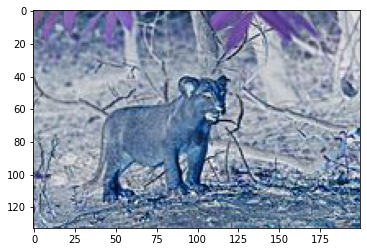

In [17]:
# Plot the negative image
# Convert the array to negative by subtracting from the maximum pixel value
plt.imshow(255 - data);

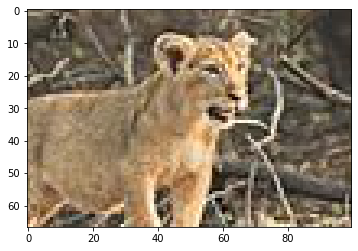

In [19]:
# Crop the picture to get just the face of the cub
original_height, original_width,_ = np.asarray(data.shape)

## Reduce the height & width to 4th part
h, w = original_height//4, original_width//4 # we have 4 sides

## Perform Array Slicing on the data
crop_face = data[h:-h, w:-w]
plt.imshow(crop_face);

In [20]:
# Save the numpy image into JPG format 
imageio.imwrite('outfile.jpg', data)

Reference:
https://scipy-lectures.org/advanced/image_processing/